In [3]:
# import libraries
import rasterio
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

In [4]:
def load_dem(path):
    with rasterio.open(path) as src:
        dem = src.read(1)
        transform = src.transform
        nodata = src.nodata

        if nodata is not None:
            # Mask nodata values
            dem = np.ma.masked_equal(dem, nodata)

        return dem, transform

In [6]:
dem, transform = load_dem("C:/Users/COMIMSA/Desktop/raster_veracruz/dem_elhigo.tif")

1
357


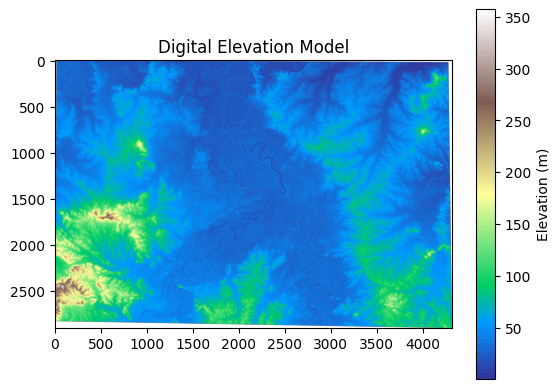

In [8]:
print(np.nanmin(dem))
print(np.nanmax(dem))
plt.imshow(dem, cmap='terrain')
plt.title("Digital Elevation Model")
plt.colorbar(label="Elevation (m)")
plt.show()

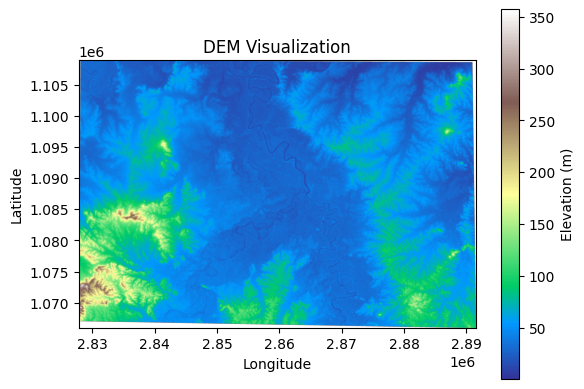

In [9]:
# Compute extent from transform
extent = [
    transform[2],                          # xmin (longitude)
    transform[2] + transform[0] * dem.shape[1],  # xmax
    transform[5] + transform[4] * dem.shape[0],  # ymin (latitude)
    transform[5]                          # ymax
]

# Plot with using geographic coordinates
fig, ax = plt.subplots()
img = ax.imshow(dem, cmap='terrain', extent=extent, origin='upper')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.colorbar(img, label='Elevation (m)')
plt.title('DEM Visualization')
plt.show()

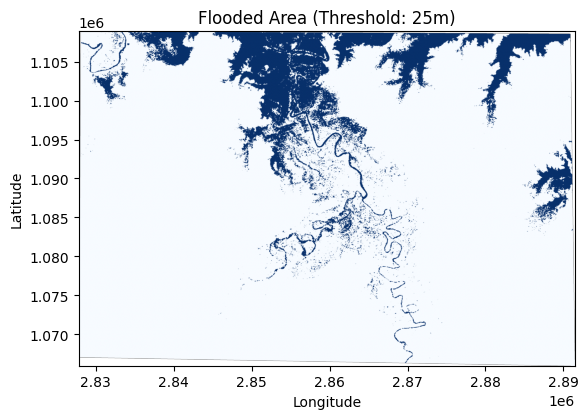

In [13]:
flood_threshold = 25  # meters
flood_mask = ((dem > 0) & (dem <= flood_threshold)).astype(int)

plt.imshow(flood_mask, extent=extent, cmap='Blues')
plt.title(f"Flooded Area (Threshold: {flood_threshold}m)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

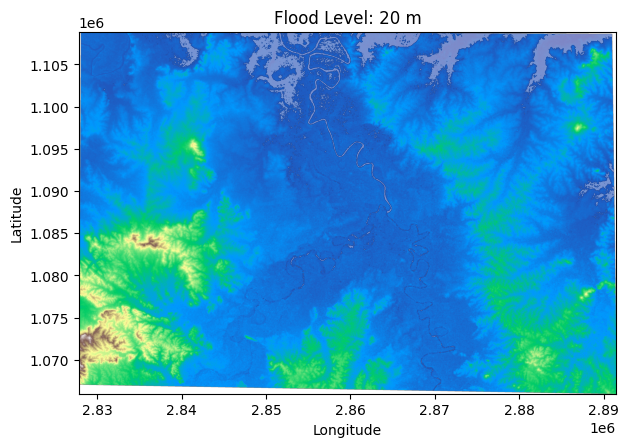

In [14]:
# flood_levels defines how high the flood rises per frame
flood_levels = np.arange(20, 50, 1)

# Set up figure and axes
fig, ax = plt.subplots()
img = ax.imshow(dem, cmap='terrain', extent=extent, origin='upper')
flood_overlay = ax.imshow(np.zeros_like(dem), cmap='Blues', alpha=0.4, extent=extent, origin='upper')
title = ax.set_title("")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Animation function
def update(frame):
    level = flood_levels[frame]
    mask = np.where(dem <= level, 1, np.nan)
    flood_overlay.set_data(mask)
    title.set_text(f"Flood Level: {level} m")
    return flood_overlay, title

# Create animation
ani = FuncAnimation(fig, update, frames=len(flood_levels), interval=300, blit=True)
plt.tight_layout()
plt.show()

# save the output as a gif
ani.save("flood_simulation.gif", writer='pillow', fps=5)